This notebook generates the plots that characterize the outcomes of the predictor selection and model calibration procedure. It reproduces Fig.3 from the main text.

The first step is to store all the information of the calibration procedure stored in **./data/calibration/model_calibration_results** in a Pandas DataFrame. The directory contains files with the optimal model configuration (i.e. predictors and hyper-parameter values) that minimize median Root Mean Squared Error across 100 spatial cross-validation folds for multiple generations of the evolutionary algorithm. Results were saved every 500 generations and the procedure was stopped once results converged at 54,000 generations. Values of 1 in th predictor columns indicate the predictor was selected and 0 that it was not.  

In [1]:
from pathlib import Path
import pandas as pd

df_calibration = pd.DataFrame()

for i,file in enumerate(Path("./data/calibration/model_calibration_results").glob('*')):
    gen_i = pd.read_csv(file)
    df_calibration = pd.concat([df_calibration,gen_i],axis="rows")

df_calibration    

,evolution$generation,evolution$evaluated,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,...,e,md,mcw,mds,g,subsample,objective$error,evolution$samples,error,npredictors
0,20500,20500,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.077122,6.0,7.797504,11.946028,1.766980,0.809778,177.866500,54,"[174.3202208251363,178.49104207089022,178.1005...","[11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,..."
1,20500,20500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.122022,5.0,8.854798,12.586769,3.940684,0.801469,158.163074,1,[158.16307354074974],[4.0]
2,20500,20500,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.081688,5.0,1.000000,14.008931,7.259982,0.730668,174.569498,52,"[174.46291576055222,175.6627290743738,176.1994...","[10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,..."
3,20500,20500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.141492,5.0,8.717726,12.244775,4.030768,0.791756,160.632080,4,"[160.39840693760382,161.80496814799523,160.865...","[4.0,4.0,4.0,4.0]"
4,20500,20500,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.066717,6.0,3.461798,5.016624,8.254255,0.821926,167.318172,48,"[166.59455136164928,167.83545977692654,167.109...","[9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,40500,40500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.122462,5.0,8.934088,12.494333,3.954969,0.799114,162.013630,49,"[160.43425543416336,161.9643398215753,160.8010...","[4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4..."
14,40500,40500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.088004,5.0,8.290366,12.820691,3.605349,0.807054,161.906570,30,"[158.743493746676,161.6705134929293,159.909306...","[4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4..."
15,40500,40500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.111160,5.0,8.283624,11.775041,3.537632,0.793060,161.907147,42,"[160.05495617867453,160.97705668297252,159.706...","[4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4..."
16,40500,40500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.101698,5.0,8.772590,12.476858,3.982877,0.796222,162.230204,56,"[158.62507622125187,160.32429671653514,160.417...","[4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4..."


The information on the number of predictors used in a given model is structured as a list with the number of predictors for each repetition of such model. Since it is the same model that is re-trained, every element in that list is the same. We collapse the list in a new column called **npredictors** in a single value. We also add a **relative_error** column which stores the ratio between the RMSE of a given model and the maximum error recorded during the calibration procedure. This is not the absolute maximum error as the results from the first 500 generations are not saved.  

In [2]:
import numpy as np
import json

df_calibration["npredictors"] = df_calibration["npredictors"].apply(lambda l: np.mean(json.loads(l)))
df_calibration["relative_error"] = df_calibration["objective$error"]/df_calibration["objective$error"].max()

Plot the evolution of the median number of predictors selected across generations of the evolutionary algorithm. The number of selected predictors continuously decreases until stabilizing at 4 after 50,000 generations.

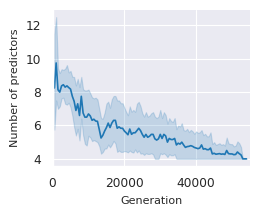

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns 

sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})
sns.set_style("darkgrid")

g = sns.relplot(df_calibration,x="evolution$generation",y="npredictors",kind="line",height=2.2, aspect = 1.2)
g.set(xlabel="Generation",ylabel="Number of predictors")
g.set(xlim=(0,55000))
plt.savefig("./figures/calibration_rmse_npredictors_300dpi.png",dpi=300,bbox_inches = "tight")
plt.savefig("./figures/calibration_rmse_npredictors.svg",bbox_inches = "tight")

The cell below plots the relative error against the number of predictors used to train the model. For each predictor number there are many instances because multiple models with the same predictors but different hyper-parametrization are tested. Smallest errors are obtained with 4 predictors. 

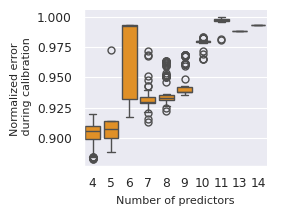

In [3]:
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})
sns.set_style("darkgrid")

df_calibration["npredictors"]=df_calibration["npredictors"].apply(lambda n: int(n))

g=sns.catplot(df_calibration,x="npredictors",y="relative_error",kind="box",orient="x",color="#ff9408", height= 2.2, aspect =1.2)
g.set(xlabel="Number of predictors")
g.set(ylabel="Normalized error \n during calibration")
plt.savefig("./figures/calibration_rmse_normalized_error_300dpi.png",dpi=300,bbox_inches = "tight")
plt.savefig("./figures/calibration_rmse_normalized_error.svg",bbox_inches = "tight")

We now calculate the frequency at which each predictor was selected in each generation. The goal is to illustrate how often each predictor was selected at each generation of the evolutionary algorithm.

In [15]:
df_calibration["selected_predictors"] = df_calibration[['bio1', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11', 'bio12', 'bio13',
       'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'gsl']].values.tolist()


# This produces a list of tuples where each tuple stores the predictor name and the selection status, i.e. 1 for selected, 0 for not selected.
def list_predictor_selection_status(selection_list):
    predictor_order = ['bio1', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10', 'bio11', 'bio12', 'bio13',
       'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'gsl']
    status_list = list(zip(predictor_order,selection_list))
    return status_list
df_calibration["selected_predictors"] = df_calibration["selected_predictors"].apply(lambda l: list_predictor_selection_status(l))

# Explode the tuples and create a new DataFrame storiong information on a predictor's presence at each generation.
df_calibration_explode = df_calibration[["predictors","evolution$generation"]].explode("predictors")
df_calibration_explode["predictor"] = df_calibration_explode["predictors"].apply(lambda t: t[0])
df_calibration_explode["selected"] = df_calibration_explode["predictors"].apply(lambda t: t[1])
df_calibration_explode = df_calibration_explode.drop(columns="predictors")

# Create a new DataFrame storing the percentage of times that each predictor was selected at each generation.
df = pd.DataFrame()
for gen in df_calibration_explode["evolution$generation"].unique():
    df_gen = df_calibration_explode[df_calibration_explode["evolution$generation"]==gen][["evolution$generation","predictor","selected"]].groupby("predictor").mean().reset_index()
    df = pd.concat([df,df_gen],axis="rows")

df["selected"]=df["selected"]*100

# Identify the final selection of predictors, i.e. all predictors that appear at least once at the last generation.
last_generation = df[df["evolution$generation"]==df["evolution$generation"].max()]
final_selection = last_generation[last_generation["selected"]>0.0]["predictor"].unique()

array(['bio1', 'bio12', 'bio5', 'bio7'], dtype=object)

Plot the percentage of times each predictor was selected accross generations. Only 4 remain after 50,000 generations. 

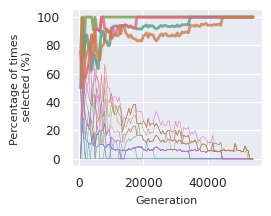

In [16]:
# Store the information on wheter a predictor was selected at the last generation or not. This is for visualization purposes.
def finally_selected(pred):
    res = np.any(final_selection == pred)
    return res
    
df["finally_selected"] = df["predictor"].apply(lambda p: finally_selected(p))

palette = sns.husl_palette(20,h=0.3,l=0.6,s=0.7)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})
sns.set_style("darkgrid")
g = sns.relplot(df, x="evolution$generation", y="selected", hue="predictor",legend=False,alpha=0.8, kind="line",size="finally_selected",sizes={True:2,False:0.4},palette=palette,height=2.2,aspect=1.2)

g.set(ylabel="Percentage of times \n selected (%)", xlabel="Generation")
plt.savefig("./figures/calibration_rmse_percentage_selected_300dpi.png",dpi=300,bbox_inches = "tight")
plt.savefig("./figures/calibration_rmse_percentage_selected.svg",bbox_inches = "tight")
